In their paper, Yao et al. [@yao2022react] introduce ReAct, a method that leverages the reasoning and decision-making capabilities of large language models (LLMs) to solve complex tasks. ReAct can generate **verbal reasoning traces** and **task specific actions** in an interleaved fashion. This allows LLMs to solve tasks by creating and adjusting action plans, handling exceptions, and interacting with external sources. ReAct combines the pretrained internal knowledge of LLMs with additional information from external sources, such as knowledge bases or environments, as illustrated in the following figure [@reactblog2022]:

<div style="text-align: center;">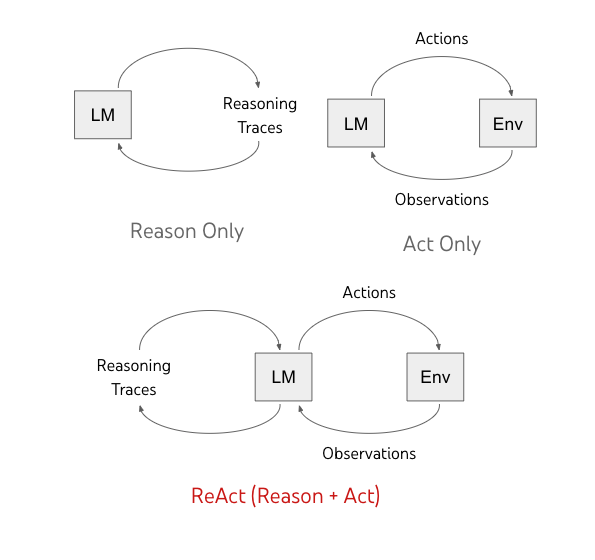</div>



According to the authors,

- Chain-of-Thought (CoT) prompting relies on models’ internal knowledge for reasoning and lacks grounding in the external world, which can result in problems of hallucination and error propagation.
- Planning and acting in interactive environments does not exploit LLMs’ ability of abstract reasoning about high-level goals or maintaining a working memory.

Therefore, ReAct approach prompts LLMs to produce both verbal reasoning traces and task specific actions in an interleaved fashion. This enables models to perform dynamic reasoning to create, maintain, and adjust high-
level plans for acting, and also interact with external environments (e.g. Wikipedia) to incorporate additional information into reasoning.

The ReAct prompts include in-context examples, which are human trajectories of actions, thoughts, and observations to solve a task. They are constructed slightly differently based on the type of tasks. For knowledge-intensive reasoning tasks, a trajectory consists of multiple thought-action-observation steps. For decision making tasks, sparse and versatile reasoning is preferred. It only need to appear in the most relevant positions in a trajectory.

There are various types of useful thoughts,

- decomposing task goals and create action plans
- injecting commonsense knowledge relevant to task solving
- extracting important parts from observations
- track progress and transit action plans 
- handle exceptions and adjust action plans


The authors list the prompts they used in Appendix C of the paper. Here is one example trajectory for a knowledge-intensive question,

> <code>Question: Musician and satirist Allie Goertz wrote a song about the "The Simpsons" character Milhouse, who Matt Groening named after who?</code>
> 
> <code>Thought 1: The question simplifies to "The Simpsons" character Milhouse is named after who. I only need to search Milhouse and find who it is named after.</code>
> 
> <code>Action 1: Search[Milhouse]</code>
> 
> <code>Observation 1: Milhouse Mussolini Van Houten is a recurring character in the Fox animated television series The Simpsons voiced by Pamela Hayden and created by Matt Groening.</code>
> 
> <code>Thought 2: The paragraph does not tell who Milhouse is named after, maybe I can look up "named after".</code>
> 
> <code>Action 2: Lookup[named after]</code>
> 
> <code>Observation 2: (Result 1 / 1) Milhouse was named after U.S. president Richard Nixon, whose middle name was Milhous.</code>
> 
> <code>Thought 3: Milhouse was named after U.S. president Richard Nixon, so the answer is Richard Nixon.</code>
> 
> <code>Action 3: Finish[Richard Nixon]</code>